## Mod 9 ICA. Community Detection using NetworkX

#### Alanna Hazlett
#### uwa6xv
#### November 6th, 2024

In this activity you will investigate the Karate Club Data and identify communities. 

See notes here:  

https://networkx.org/documentation/stable/auto_examples/graph/plot_karate_club.html

**BACKGROUND**  
This was data collected from the members of a university karate club by Wayne Zachary.  
The edges represents the presence or absence of ties among the members of the club.

Review the code below that investigates this data set and builds a graphical model. Answer the questions below which focus on community detection. 

In [18]:
# Import Modules

import sys
import networkx as nx 
import matplotlib.pyplot as plt
import matplotlib
 

%matplotlib inline

print(f"Python version {sys.version}")
print(f"networkx version: {nx.__version__}")
print(f"matplotlib version: {matplotlib.__version__}")


Python version 3.11.4 (v3.11.4:d2340ef257, Jun  6 2023, 19:15:51) [Clang 13.0.0 (clang-1300.0.29.30)]
networkx version: 3.3
matplotlib version: 3.8.2


In [2]:
#Let's import the ZKC graph:
ZKC_graph = nx.karate_club_graph()

#Let's keep track of which nodes represent John A and Mr Hi
Mr_Hi = 0
John_A = 33

#Let's display the labels of which club each member ended up joining
club_labels = nx.get_node_attributes(ZKC_graph,'club')

#just show a couple of the labels
print({key:club_labels[key] for key in range(10,16)})


{10: 'Mr. Hi', 11: 'Mr. Hi', 12: 'Mr. Hi', 13: 'Mr. Hi', 14: 'Officer', 15: 'Officer'}


## Club / Group

Members of the karate group were divided on some policy and split into groups / clubs of support. Members either belonged to Mr Hi's Support Club or Officer's (John A) Support Club. 

In [16]:
# # Version Issue
# A = nx.convert_matrix.to_numpy_matrix(ZKC_graph)
# A

In [15]:
A = nx.to_numpy_array(ZKC_graph)

array([[0., 4., 5., ..., 2., 0., 0.],
       [4., 0., 6., ..., 0., 0., 0.],
       [5., 6., 0., ..., 0., 2., 0.],
       ...,
       [2., 0., 0., ..., 0., 4., 4.],
       [0., 0., 2., ..., 4., 0., 5.],
       [0., 0., 0., ..., 4., 5., 0.]])

# Visualize the Network

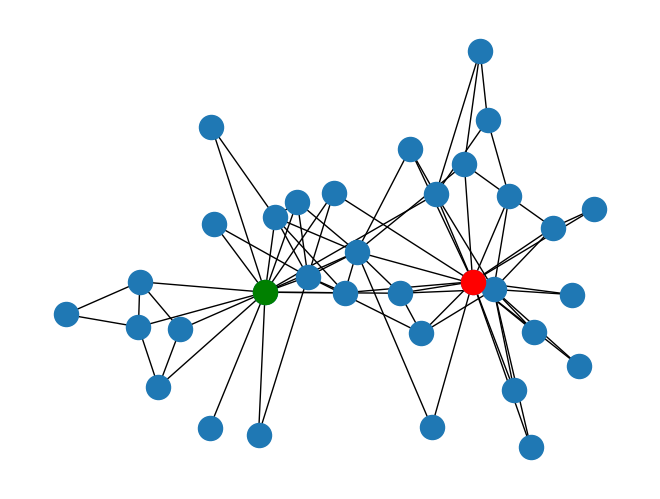

In [4]:
#To plot using networkx we first need to get the positions we want for each node. 
#Here we will use a ciruclar layout but there are many other variations you could choose!
circ_pos   = nx.circular_layout(ZKC_graph) 
spring_pos = nx.spring_layout(ZKC_graph) 

graph_pos  = spring_pos

#Use the networkx draw function to easily visualise the graph
nx.draw(ZKC_graph,graph_pos)

#let's highlight Mr Hi (green) and John A (red) the leaders of the different support groups
nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=[Mr_Hi], node_color='g', alpha=1)
nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=[John_A], node_color='r', alpha=1)

# Connections

There are many graph measures to assess "connectivity" of the nodes such as densities, degree, modularity and more! This can help us to identify communities given this network construction. 

In [19]:
density = nx.density(ZKC_graph)

print('The edge density is: ' + str(density))

The edge density is: 0.13903743315508021


In [6]:
#the degree function in networkx returns a DegreeView object capable of iterating through (node, degree) pairs
degree = ZKC_graph.degree()

degree_list = []

for (n,d) in degree:
    degree_list.append(d)

av_degree = sum(degree_list) / len(degree_list)

print('The average degree is ' + str(av_degree))

The average degree is 4.588235294117647


Text(0.5, 1.0, 'Karate Club: Node Degree')

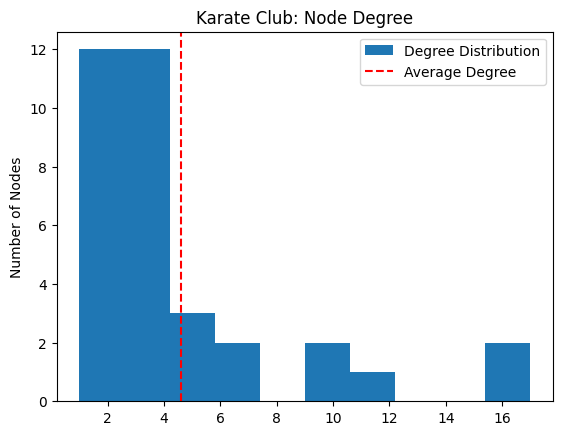

In [7]:
#we now plot the degree distribution to get a better insight
plt.hist(degree_list,label='Degree Distribution')
plt.axvline(av_degree,color='r',linestyle='dashed',label='Average Degree')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Karate Club: Node Degree')

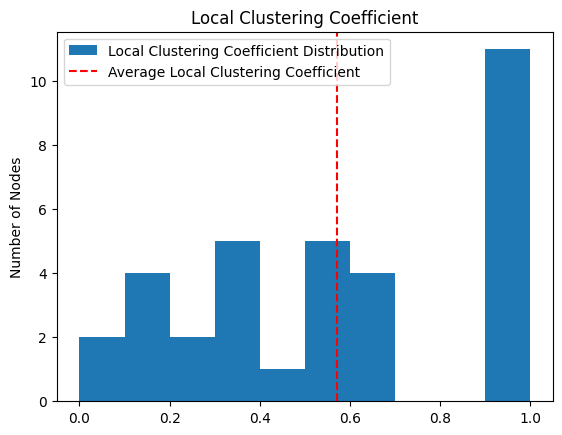

In [8]:
#Now we can compute the local clustering coefficient
local_clustering_coefficient = nx.algorithms.cluster.clustering(ZKC_graph)

#lets find the average clustering coefficient
av_local_clustering_coefficient = sum(local_clustering_coefficient.values())/len(local_clustering_coefficient)

#similarly to the degree lets plot the local clustering coefficient distribution
plt.hist(local_clustering_coefficient.values(),label='Local Clustering Coefficient Distribution')
plt.axvline(av_local_clustering_coefficient,color='r',linestyle='dashed',label='Average Local Clustering Coefficient')
plt.legend()
plt.ylabel('Number of Nodes')
plt.title('Local Clustering Coefficient')
plt.show()

# Community Analysis

There are many algorithms that exist to identify communities based on the measures discussed aboved. Networkx has a number of community identification algorithms. A greedy approach is shown below. 

Greedy modularity maximization (Clauset-Newman-Moore) begins with each node in its own community and joins the pair of communities that most increases modularity until no such pair exists.

See more about modularity here: https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.community.quality.modularity.html#networkx.algorithms.community.quality.modularity


In [9]:
from networkx.algorithms.community.modularity_max import greedy_modularity_communities

#preform the community detection
c = list(greedy_modularity_communities(ZKC_graph))

#Let's find out how many communities we detected
print(len(c))

3


In [10]:
#Lets see these 3 clusters
community_0 = sorted(c[0])
community_1 = sorted(c[1])
community_2 = sorted(c[2])

print(community_0)
print(community_1)
print(community_2)


[8, 14, 15, 18, 20, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33]
[1, 2, 3, 7, 9, 12, 13, 17, 21]
[0, 4, 5, 6, 10, 11, 16, 19]


#__Question #1. Greedy Algorithms.__
Given what you know about greedy algorithm schemes, on what factor is the greedy selection based in the Greedy modularity maximization algorithm (Clauset-Newman-Moore)? Given n nodes, what would be the expected time complexity of this algorithm? 
Refer to this paper for details: https://arxiv.org/pdf/cond-mat/0408187.pdf

> The selection is made based on the modularity. The algorithm starts with a node known to be in the community and joins communities by making modularity larger, until there are no more options. "If high values of the modularity correspond to good divisions of a network into communities, then one should be able to find such good divisions by searching through the possible candidates for ones with high modularity." From page 2 of https://arxiv.org/pdf/cond-mat/0408187.pdf. 

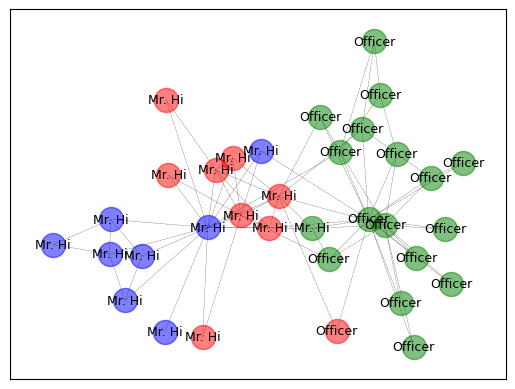

In [11]:
#draw each set of nodes in a separate colour
nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=community_0, node_color='g', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=community_1, node_color='r', alpha=0.5)
nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=community_2, node_color='b', alpha=0.5)

#now we can add edges to the drawing 
nx.draw_networkx_edges(ZKC_graph, graph_pos, style='dashed', width = 0.2)

#finally we can add labels to each node corresponding to the final club each member joined 
nx.draw_networkx_labels(ZKC_graph, graph_pos, club_labels, font_size=9)

plt.show()

#__Question 2. Qualitative Assessment__
In your opinion (and within the context of support club division) how did the community detection algorithm do? Explain.

> It looks like the Officer was well separated, with only one in Mr. Hi's group. It did not do quite as well with Mr. Hi's group, as it divided it into two groups, when it should be one. We can also see that there was one in Officer's group. The algorithm divided the network into three groups total and we know there should have only been two groups.

# "Tight Knit" Groups.

In communities there are often subgroups that are "tightly knit". This may be observable or quantifiable based on some form of increased connectivity. This is very closely related to cliques on a graph.

Networkx has a find_cliques() method which will find all cliques. 

In [12]:
list(nx.find_cliques(ZKC_graph))

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

# __Question 3. Karate Cliques__

Lets see if we can use cliques to identify "core members" or core supporters of Mr. Hi's Group and the Officers Group. Use networkx to find the 3 or 4 largest cliques. Use find_cliques(...) or nx.community.k_clique_communities(...). (Note these cliques may not be disjoint). 

Visualize the results and analyze the results. Do the cliques seem to indicate "core" supporters of each group? Are all clique members within the same support group? Any other interesting observations here?



> It appears that Mr. Hi himself is either node 0, 1, 2, or 3, as those 4 nodes are all apart of the 2 largest cliques within Mr. Hi's community. We would suspect this, because we assume that the leader would be very connected within the community and probably have a set of members that are closes to him, because they are the sub-leaders within the community. We can also note that Mr. Hi's inner circle is larger than Officier's, as both of Mr. Hi's cliques are of size 5, whereas Officier's cliques are of size 4. We can conclude that Officier is either node 32 or 33, because those are both apart of the largiest cliques for Officier.
>
> We can also see that there is one person who is in Mr. Hi's community, but is in the Officier's clique (inner circle). This could be an example of a spy, working to get information from Officier's community to use for the advantage of Mr. Hi's community. 

In [48]:
clique_list = list(nx.find_cliques(ZKC_graph))
clique_list

[[0, 1, 17],
 [0, 1, 2, 3, 13],
 [0, 1, 2, 3, 7],
 [0, 1, 19],
 [0, 1, 21],
 [0, 4, 10],
 [0, 4, 6],
 [0, 5, 10],
 [0, 5, 6],
 [0, 8, 2],
 [0, 11],
 [0, 12, 3],
 [0, 31],
 [1, 30],
 [2, 32, 8],
 [2, 9],
 [2, 27],
 [2, 28],
 [5, 16, 6],
 [33, 32, 8, 30],
 [33, 32, 14],
 [33, 32, 15],
 [33, 32, 18],
 [33, 32, 20],
 [33, 32, 22],
 [33, 32, 23, 29],
 [33, 32, 31],
 [33, 9],
 [33, 13],
 [33, 19],
 [33, 26, 29],
 [33, 27, 23],
 [33, 28, 31],
 [24, 25, 31],
 [24, 27],
 [25, 23]]

In [59]:
# Testing code to make sure the cliques were selected correctly
# commune = [clique_list[1], clique_list[2], clique_list[19], clique_list[25]]
# commune

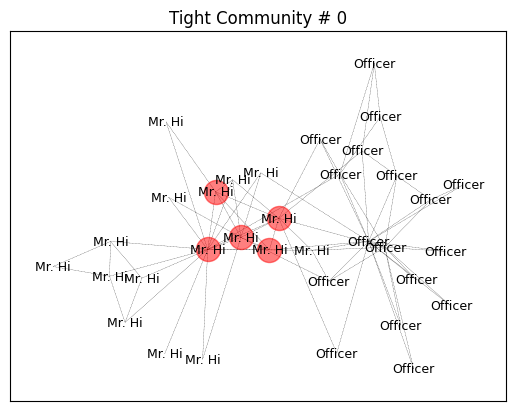

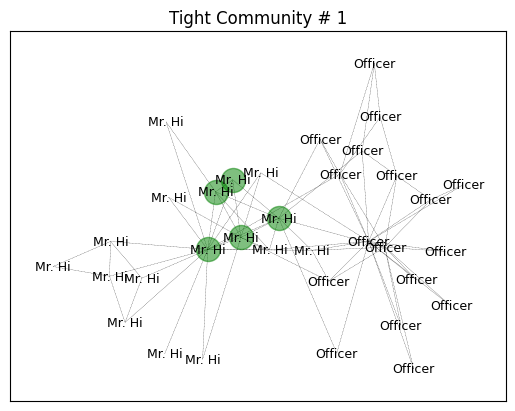

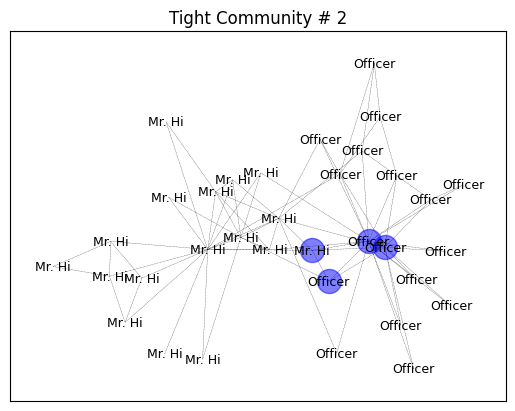

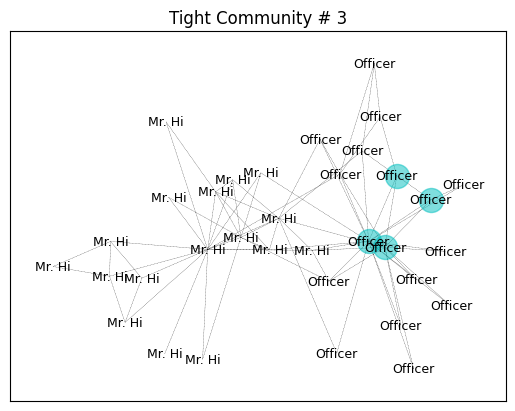

In [58]:

#Identify "tight-knit" communities

from networkx.algorithms import community

# Find largest cliques here ... 
#
# INSERT YOUR CODE HERE :)
commune = [clique_list[1], clique_list[2], clique_list[19], clique_list[25]]


color = ['r', 'g', 'b', 'c','k','m']
for i in range(len(commune)): 
  nx.draw_networkx_nodes(ZKC_graph, graph_pos, nodelist=commune[i], node_color=color[i], alpha=0.5)
  #now we can add edges to the drawing 
  nx.draw_networkx_edges(ZKC_graph, graph_pos, style='dashed',width = 0.2)
  #finally we can add labels to each node corresponding to the final club each member joined 
  nx.draw_networkx_labels(ZKC_graph, graph_pos, club_labels,font_size=9)
  plt.title(str("Tight Community # " + str(i)))
  plt.show()


> It appears that Mr. Hi himself is either node 0, 1, 2, or 3, as those 4 nodes are all apart of the 2 largest cliques within Mr. Hi's community. We would suspect this, because we assume that the leader would be very connected within the community and probably have a set of members that are closes to him, because they are the sub-leaders within the community. We can also note that Mr. Hi's inner circle is larger than Officier's, as both of Mr. Hi's cliques are of size 5, whereas Officier's cliques are of size 4. We can conclude that Officier is either node 32 or 33, because those are both apart of the largiest cliques for Officier.
>
> We can also see that there is one person who is in Mr. Hi's community, but is in the Officier's clique (inner circle). This could be an example of a spy, working to get information from Officier's community to use for the advantage of Mr. Hi's community. 